In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('/content/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class lable','Alcohol','Malic acid']


In [3]:
df

,Class lable,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


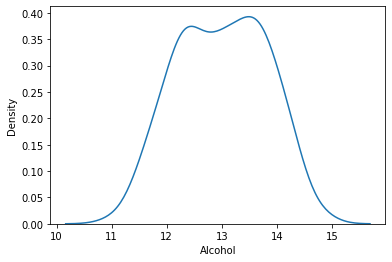

In [4]:
sns.kdeplot(df['Alcohol'])

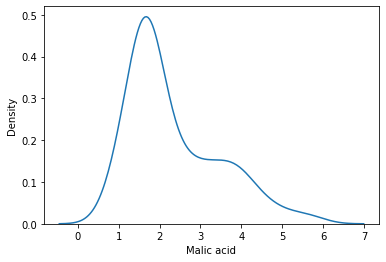

In [5]:
sns.kdeplot(df['Malic acid'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


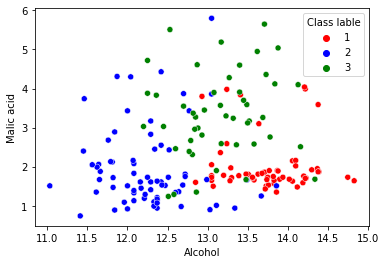

In [7]:
color_dict = {1:'red',3:'green',2:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class lable'],palette=color_dict )

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class lable',axis=1),
                                                    df['Class lable'],test_size=0.3,
                                                    random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

## MinMaxScaler
### The method scales each feature to a specified range, typically between 0 and 1, but can be set to any minimum and maximum values.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [12]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [13]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


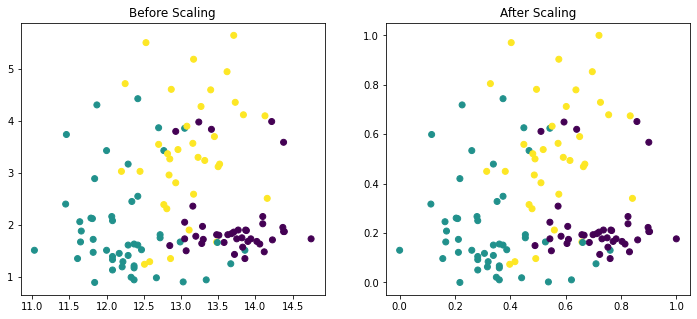

In [15]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))


ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

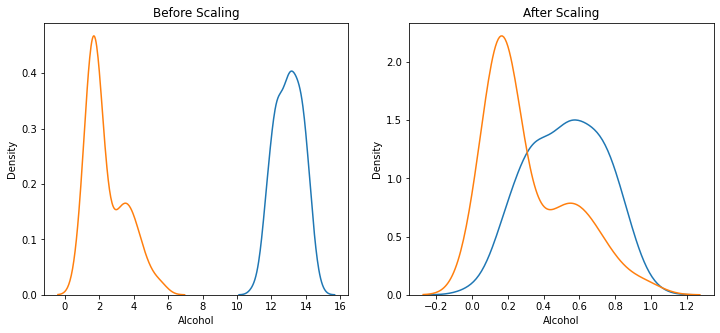

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
plt.show()

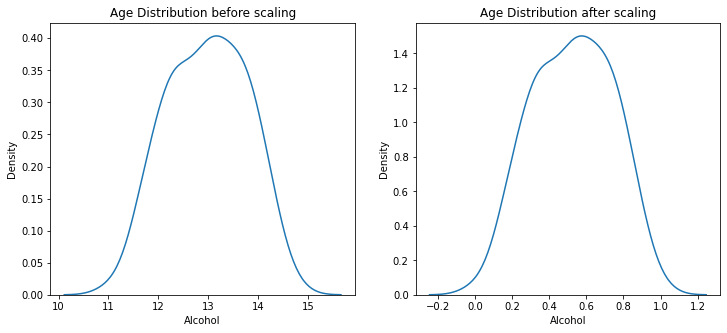

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Age Distribution before scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)

ax2.set_title('Age Distribution after scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
plt.show()


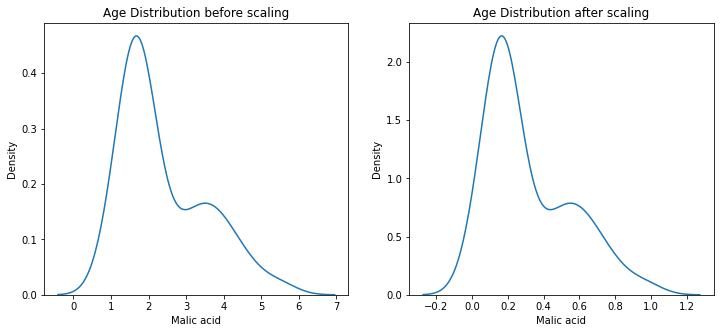

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Age Distribution before scaling')
sns.kdeplot(X_train['Malic acid'],ax=ax1)

ax2.set_title('Age Distribution after scaling')
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
plt.show()


## Drawback of MinMaxScaler


### *   Sensitivity to Outliers: MinMaxScaler is sensitive to outliers and can result in skewed data if the outliers are not removed before scaling. This can affect the accuracy of the model.

### *   Preserves the Shape of the Distribution: MinMaxScaler preserves the shape of the distribution of the features, which may not be ideal for some algorithms that assume normal or Gaussian distributions.
### *   Loses Information: MinMaxScaler loses information about the distributions of the features, as it only preserves the minimum and maximum values. This can make it difficult to interpret the results of the model.


### *   Sensitive to the Scale of the Data: MinMaxScaler is sensitive to the scale of the data and can produce different results for different datasets. This can lead to inconsistencies and difficulty in comparing results across different experiments.



# Mean Normalization


### *   Mean normalization is a method of feature scaling that transforms the values of a feature so that they have a zero mean. This is accomplished by subtracting the mean value of the feature from each value, and then dividing the result by the standard deviation of the feature. The mean-normalized values are then transformed to have a mean of zero.
### *   The purpose of mean normalization is to ensure that the features have similar ranges and to balance the scale of the features in a dataset. This can help to prevent one feature from having a disproportionate influence on the results of a machine learning algorithm.


### *   Mean normalization is useful for algorithms that assume that the data is normally distributed, as it balances the scale of the features and helps to ensure that each feature has an equal influence on the results.





# MaxAbsScaler 



### *  MaxAbsScaler is a preprocessing method in the scikit-learn library in Python, used to scale the features of a dataset so that their absolute values are between a specified minimum and maximum value. The method scales each feature to a specified range, typically between 0 and 1, but can be set to any minimum and maximum values.

### *   MaxAbsScaler works by subtracting the absolute minimum value of each feature from all its values, and then dividing the result by the absolute range (i.e., the difference between the absolute maximum and absolute minimum values). The scaled values of each feature are then transformed to the specified minimum and maximum range.


### *   MaxAbsScaler is particularly useful for sparse datasets, as it can handle sparse data without causing zero variance for sparse features. This makes MaxAbsScaler a popular choice for scaling the features in image processing and text analysis problems.





## Robust scaling




### *   Robust scaling, also known as the "Robust Scaler", is a preprocessing method in the scikit-learn library in Python that is used to scale the features of a dataset in a way that is robust to outliers. Unlike other feature scaling methods such as standardization and MinMaxScaler, robust scaling does not assume that the data is normally distributed or that the features are centered around zero. Instead, it uses the median and quartile range of each feature to transform the values of the features to a scale that is less sensitive to outliers.

### *   Robust scaling works by subtracting the median of each feature from all its values, and then dividing the result by the interquartile range (IQR), which is the difference between the 75th percentile and 25th percentile of each feature. The IQR is used instead of the standard deviation because it is less sensitive to outliers and gives a better representation of the spread of the data.



### *   Robust scaling is particularly useful when dealing with datasets that contain a large number of outliers, as it is less sensitive to the outliers and can produce more accurate results. This makes robust scaling a popular choice for problems where the data is not normally distributed, or where the presence of outliers is expected.






# Conclusion

## MinMaxScaler

### This method scales the values of a feature to a range between 0 and 1. MinMaxScaler is best used when the features in the dataset have a wide range of values and units of measurement, and when you want to ensure that each feature has a similar influence on the results of the model.

## StandardScaler

### This method standardizes the values of a feature by transforming them to have a mean of 0 and a standard deviation of 1. StandardScaler is best used when the features in the dataset are not normally distributed, or when you want to ensure that each feature has a similar influence on the results of the model.

## RobustScaler

### This method scales the values of a feature in a way that is robust to outliers. RobustScaler subtracts the median of each feature from all its values, and then divides the result by the interquartile range (IQR). RobustScaler is best used when dealing with datasets that contain a large number of outliers.

## MaxAbsScaler

### This method scales the absolute values of the features to a specified minimum and maximum value. MaxAbsScaler is best used when dealing with sparse datasets, as it can handle sparse data without causing zero variance for sparse features.

## In general, the choice of feature scaling method depends on the nature of the dataset, the goals of the analysis, and the type of machine learning algorithm being used. It is important to carefully consider the strengths and weaknesses of each method and to experiment with different methods to see which one produces the best results for a given problem.